In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

%matplotlib inline

In [3]:
df = pd.read_csv('/home/sha/data/fandango_data/fandango/fandango_score_comparison.csv')
print(df.head())

                             FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   
1          67              7.5   7.1             5.0                   4.5   
2          64              8.1   7.8             5.0                   4.5   
3          22              4.7   5.4             5.0                   4.5   
4          29              3.4   5.1             3.5                   3.0   

   RT_norm  RT_user_norm         ...           IMDB_norm  RT_norm_round  \
0     3.70 

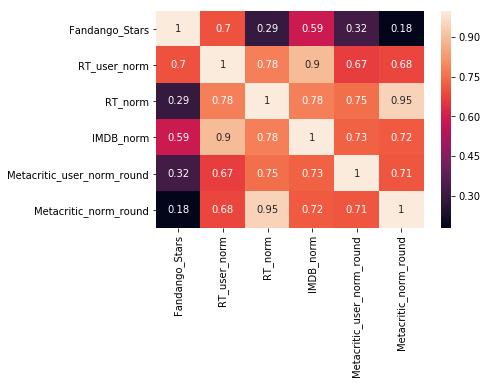

In [4]:
rankings_lst = [
    'Fandango_Stars',
    'RT_user_norm',
    'RT_norm',
    'IMDB_norm',
    'Metacritic_user_norm_round',
    'Metacritic_norm_round'
]

def my_heatmap(df):
    fig, axes = plt.subplots()
    sns.heatmap(df, annot=True)
    plt.show()
    plt.close()

my_heatmap(df[rankings_lst].corr(method='pearson'))

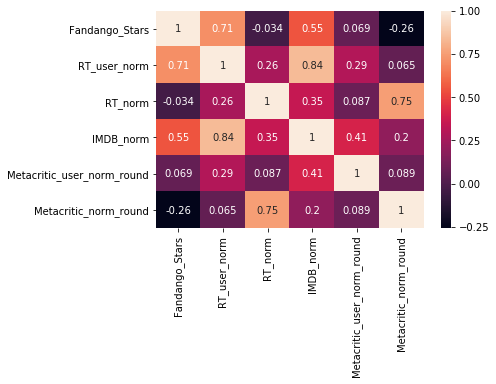

In [5]:
RT_lst = df['RT_norm'] >= 4.
my_heatmap(df[RT_lst][rankings_lst].corr(method='pearson'))

In [11]:
feature_cols = ['Fandango_Stars', 'RT_user_norm', 'RT_norm','Metacritic_user_norm', 'Metacritic_norm']
X = df.loc[:, feature_cols]
y = df['IMDB_norm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)

dim = len(feature_cols) + 1
X_train = X_train.assign(independent=pd.Series([1] * len(y_train), index=X_train.index))
X_test = X_test.assign(independent=pd.Series([1] * len(y_train), index=X_test.index))

In [12]:
P_train = X_train.as_matrix(columns=None)
P_test = X_test.as_matrix(columns=None)

/home/sha/anaconda3/envs/p36/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/sha/anaconda3/envs/p36/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [20]:
q_train = np.array(y_train.values).reshape(-1, 1)
q_test = np.array(y_test.values).reshape(-1, 1)

In [25]:
P = tf.placeholder(tf.float32, [None, dim])
q = tf.placeholder(tf.float32, [None, 1])
T = tf.Variable(tf.ones([dim, 1]))
dim

6

In [26]:
bias = tf.Variable(tf.constant(1.0, shape=[dim]))
q_ = tf.add(tf.matmul(P, T), bias)

In [28]:
cost = tf.reduce_mean(tf.square(q_ - q))
learning_rate = 0.0001
training_op = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

In [29]:
init = tf.global_variables_initializer()
cost_history = np.empty(shape=[1], dtype=float)
cost_history

array([0.0001])

In [30]:
training_epochs = 50000
with tf.Session() as sess:
    sess.run(init)
    cost_history = np.empty(shape=[1], dtype=float)
    t_history = np.empty(shape=[dim, 1], dtype=float)
    for epoch in range(training_epochs):
        sess.run(training_op, feed_dict={P: P_train, q: q_train})
        cost_history = np.append(cost_history, sess.run(cost, feed_dict={P: P_train, q: q_train}))
        t_history = np.append(t_history, sess.run(T, feed_dict={P: P_train, q: q_train}), axis=1)
        q_pred = sess.run(q_, feed_dict={P: P_test})[:, 0]
        mse = tf.reduce_mean(tf.square(q_pred - q_test))
        mse_temp = mse.eval()
print(mse_temp)
RMSE = math.sqrt(mse_temp)
print(RMSE)

KeyboardInterrupt: 